<tr>
<td style="text-align: center;">
    <div style="display: inline-block;text-align: center">
        <img src="Logo_CentraleSupélec.png" style="width: 30%;">
        <img src="Logo-HeadMind-Partners.png" style="width: 50%;">
    </div>
</td>
</tr>


<h1 style="font-family: Georgia, Arial; font-size: 36px;">News analysis </h1>
<p style="font-size: 24px;">Infonum Project</p>
<p style="font-size: 24px;"></p>
<p style="font-size: 24px;">Members: Francisco García, Olivia Moyal, Ibrahim Ramdane</p>


This notebook is dedicated to the analysis of news data to unveil trends over time of different types of news. We utilize a DataFrame containing news articles and various metrics, including the similarity of their embeddings to a reference text. This information is useful for clustering news articles into distinct groups based on their semantic similarities (which is a column that the DataFrame is supposed to have). Additionally, we will incorporate information regarding the presence of specific entities within these texts. With these enriched datasets, we aim to assess the semantic proximity of news articles to a predefined target, such as Apple Inc., thereby providing valuable insights into the discourse surrounding the target entity.


#### Import Librairies

In [23]:
import pickle
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

We will work with the following pandas DataFrame:

In [24]:
df = pd.read_pickle('df embedding and entity and cluster and similarity- 1 janvier to 7 mars')

In [25]:
def plot_of_clusters(df, variable):
    # define figure size
    plt.figure(figsize=(16, 5))
    
    plt.subplot(1, 1, 1)
    sns.histplot(data=df, x=variable, kde=True, color='#006837', stat="density", alpha=0.5, bins=25) # Adjust bins
    plt.title('Histogram')
    plt.xlabel(variable)
    plt.ylabel('Density')
    plt.xticks(rotation=35)  # Rotate x-axis labels by 35 degrees
    plt.show()

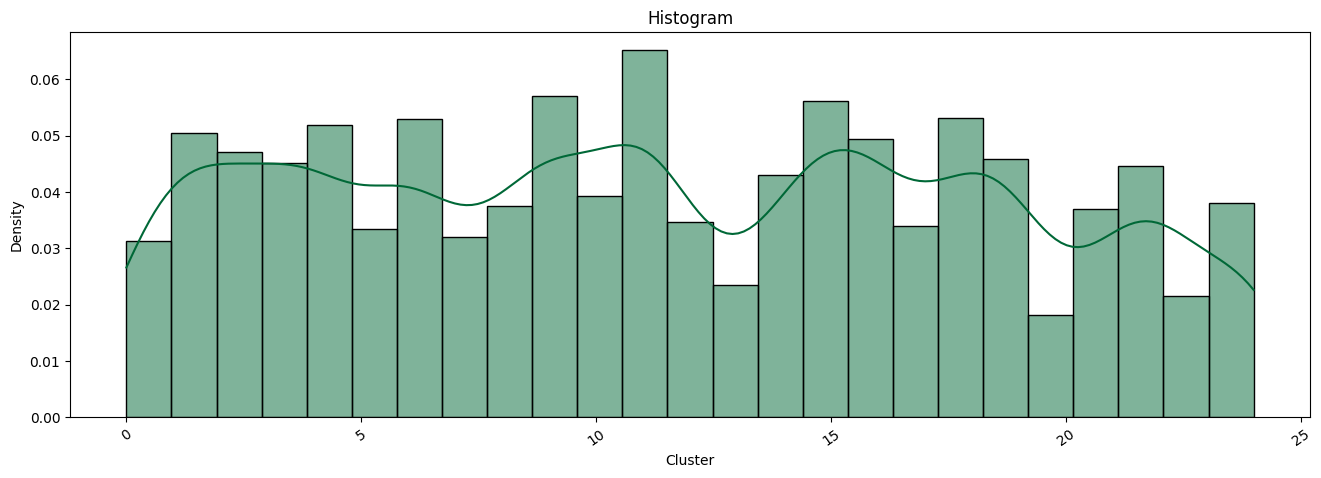

In [26]:
plot_of_clusters(df,'Cluster')

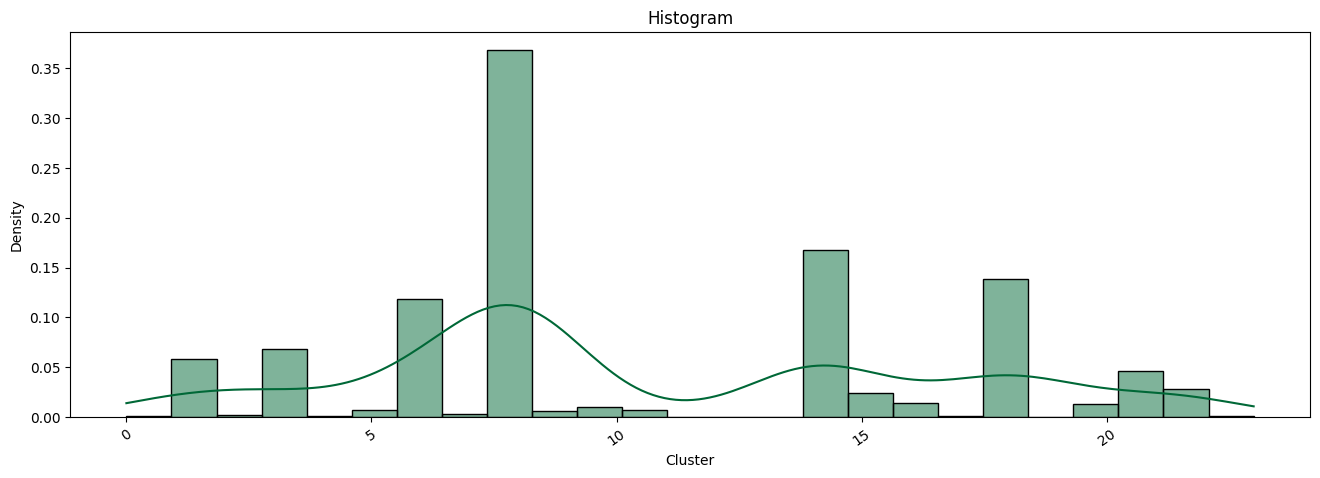

In [27]:
df_similar= df[df['Similarity'] > 0.63]
plot_of_clusters(df_similar,'Cluster')

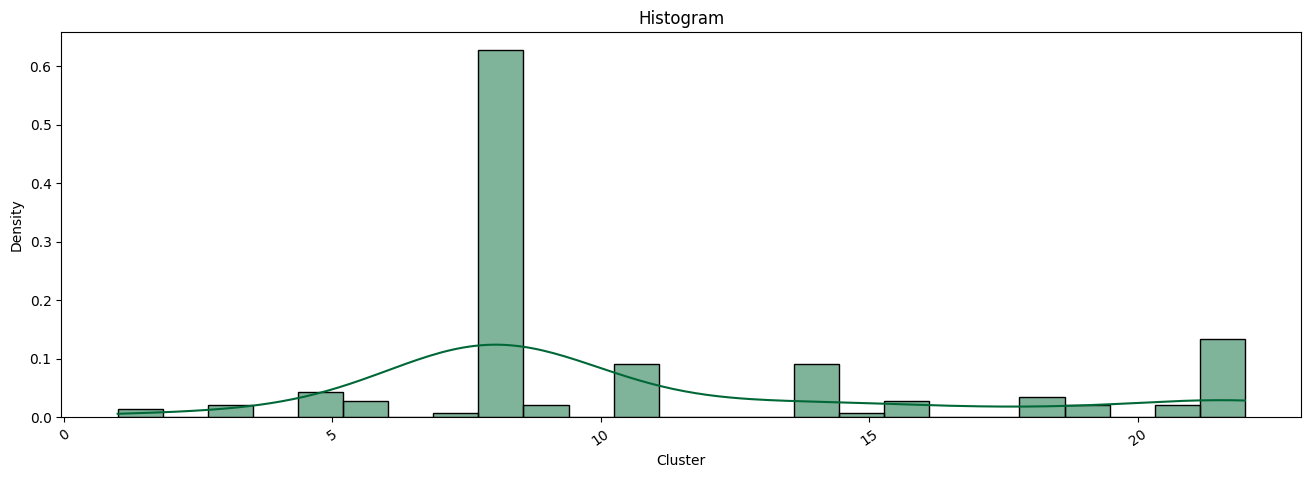

In [28]:
df_apple= df[df['Entity'] > 0.5]
diagnostic_plots(df_apple,'Cluster')

In [38]:
index_to_consider_entity = list()
index_to_consider_entity.append(df_similar['Cluster'].value_counts()[0:6].index)
df_apple['Cluster'].value_counts()[0:6]

8     89
22    19
14    13
11    13
5      6
18     5
Name: Cluster, dtype: int64

In [71]:
index_to_consider_entity

[Int64Index([8, 14, 18, 6, 3, 1], dtype='int64')]

In [76]:
index_to_consider_entity[0][1]

14

In [43]:
for index, row in df_apple[df_apple['Cluster'] == 8].iterrows():
    print(row['Title'])

Apple broke a 12-year tradition in 2023 and it has to do with iPads
A software engineer ranks his top 10 hardest interviews after landing 18 offers from tech companies like Apple, Palantir, and Meta
Huawei's homegrown operating system, launched after the company was put on a U.S. blacklist, may soon overtake Apple's iOS in China
Read up on Apple’s tremendous Godzilla series, Monarch: Legacy of Monsters
Apple's Trade In program lets you get credit toward new devices or a gift card
iOS Explained: Apple's operating system version history, features, and iPhone capabilities
Apple pays out over claims it deliberately slowed down iPhones
Belkin's Stand Pro iPhone dock uses Apple's DockKit to track you around a room
AppleCare: What you need to know about coverage, benefits, and value of your Apple devices
Apple and Hey squash another App Store beef
Insider Today: Apple's next big launch
Apple Support contact numbers, chat for tech help with accessibility, enterprise accounts, Cash, and more
Ap

Cluster 8 talks about what happend with Apple inside the industry, giving rich information that could be used to understand the stock changes of Apple Inc.

In [42]:
for index, row in df_apple[df_apple['Cluster'] == 22].iterrows():
    print(row['Title'])

Apple-Podcasts-Top-Podcasts
Scorsese’s Killers of the Flower Moon premieres globally on Apple TV+ on January 12
Apple-Podcasts-Top-Podcasts
Apple Music Replay lets you see your top 100 songs for the year to date and updates every week
MLS, Apple TV to make 8-part docuseries produced by 'Formula 1: Drive to Survive' veterans
Apple just dropped a mysterious trailer for its latest sci-fi series Constellation
Apple-Podcasts-Top-Podcasts
The True Story Behind Apple TV+’s World War II Drama Masters of the Air
Apple, Skechers fall; Amazon, Deckers Outdoor rise, Friday, 2/2/2024
Apple-Podcasts-Top-Podcasts
Jon Stewart's reason for parting ways with Apple TV+ offers a glimpse into the fury he'll unload on 'The Daily Show'
Apple Podcasts– Top 10
Apple’s sci-fi drama Invasion is getting a third season
Apple Podcasts
US-Apple-Books-Top-10
US-Apple-Books-Top-10
Macy's, United Rentals rise; Apple, Spirit Airlines fall Monday, 3/4/2024
Apple Store/ Apple Podcasts
US-Apple-Books-Top-10


As we can see, cluster 22 talks about Apple podcasts and TV series/movies. Maybe not the best to understand the changes in the stock value. 

In [44]:
for index, row in df_apple[df_apple['Cluster'] == 14].iterrows():
    print(row['Title'])

Apple shares slide following Barclays downgrade, dragging down markets
Apple shed $100 billion of market value in a single day. That's more than Ford and GM are worth combined.
Microsoft is breathing down Apple's neck as the valuation gap between the Big Tech rivals narrows to just $30 billion
Microsoft Surpasses Apple in Market Value, Reclaiming Top Spot in Tech
Microsoft surpasses Apple to become the world's most valuable company for the first time in 2 years as the iPhone maker hits a patch of 'nothing special'
Move over Apple: Microsoft is now the most valuable publicly traded company
Microsoft's market cap hit $2.89 trillion as it overtook Apple as the world's most valuable public company
Apple stock could jump 23% as AI will drive iPhone upgrade cycle, Bank of America says
Spotify blasts Apple's 'outrageous' new commission fee
Apple thanked a man charged with defrauding them out of more than $2.5 million in gift cards and electronics
The EU is reportedly set to hit Apple with a $

Cluster 14 shows the market dimesion of Apple. This could be usefull also.

In [45]:
for index, row in df_apple[df_apple['Cluster'] == 11].iterrows():
    print(row['Title'])

Apple is sending out checks for ‘batterygate’ class action claims
Your payments from Apple’s ‘batterygate’ settlement may finally be on the way
Apple risks a hit to its sales after Supreme Court declines to review Epic’s app store case | CNN Business
'Fortnite' maker Epic Games to contest Apple’s ‘27% tax’ on outside payments
Applebee’s is offering a subscription pass for your date nights | CNN Business
Spotify accuses Apple of ‘extortion’ with new App Store tax
Apple Pay is down for Chase customers, and perhaps others
Unsealed court doc shows why Apple rejected Microsoft’s offer to buy Bing
Nolte: If Apple Can ‘Lose’ 650 of Steven Van Zandt’s Movies, Yours Sure Aren’t Safe
Apple under fire for disabling iPhone web apps—EU asks developers to weigh in
Apple Music – Top Music
Apple may not do a spring event this year
Apple buying Rivian? Nissan with Fisker? Tesla rivals’ woes spark speculation


Group 11 seems to be closer to the legal side, so it could also be useful.

In [29]:
index_to_consider = list()
index_to_consider.append(df_similar['Cluster'].value_counts()[0:6].index)
df_similar['Cluster'].value_counts()[0:6]

8     387
14    176
18    146
6     125
3      72
1      61
Name: Cluster, dtype: int64

In [46]:
for index, row in df_apple[df_apple['Cluster'] == 18].iterrows():
    print(row['Title'])

I paid $2,500 to spend New Year's Eve at Applebee's and it was worth every penny
A top exec at Kim Kardashian’s new private equity fund once made it her mission to convince Apple’s Tim Cook not to hire her. It didn’t work
I've been using Vision Pro for 48 hours. It feels like Apple is onto something.
Jon Stewart says Apple 'didn’t want me to say things that might get me in trouble'
RIP Apple Car. This Is Why It Died


In [48]:
for index, row in df_similar[df_similar['Cluster'] == 18].iterrows():
    print(row['Title'])

I run a website teaching people how best to earn miles. These are the 7 worst mistakes I see consumers make with their credit cards.
A boomer who left the Bay Area to travel around Asia and the Caribbean explains how it's made his life cheaper and more peaceful
In the age of unchecked billionaires and corporate bad behavior, everyday people have a million reasons to say something if they see something
A Burger King worker who said he didn't miss a day of work in 27 years has bought a house using crowdfunding donations
I compared American Eagle and Abercrombie and found 2 millennial brands remaking themselves for Gen Z in very different ways
Verizon Could Owe You Up to $100. Here’s How to File a Claim
A self-described real estate visionary was charged with running an Airbnb scam that made millions by tricking guests into booking non-existent properties
The CEO of failed crypto firm HyperVerse boasted an extraordinary résumé. He may be completely made up
Meet the moms who fly business cl

Cluster 18 is closer to topic trends. This could be usefull or no.

In [49]:
for index, row in df_similar[df_similar['Cluster'] == 6].iterrows():
    print(row['Title'])

The 'Effective Accelerationism' movement doesn't care if humans are replaced by AI as long as they're there to make money from it
The world's 10 wealthiest people got nearly half a trillion dollars richer in 2023—and Elon Musk was the biggest winner
How artificial intelligence can help beavers fight floods, droughts and wildfires
A Nobel Prize-winning economist warned students against rushing into STEM to get AI jobs, saying they may sow their 'own seeds of self-destruction'
I advised the EU on its landmark AI Act. Here’s how it got preempted by the U.S. and U.K., why it almost got derailed by ChatGPT, and how it will shape regulation in 2024
China's BYD is rivaling Tesla in size. Can it also match its global reach?
The Dell XPS laptop, as we know and love it, is no more
China's BYD is rivaling Tesla in size. Can it also match its global reach?
Japan takes earthquake safety seriously. Here's how its culture of preparedness keeps so many people alive.
Elon Musk: SpaceX needs to build St

Cluster 6 is AI and Big Tech. This could be useful

In [47]:
for index, row in df_apple[df_apple['Cluster'] == 6].iterrows():
    print(row['Title'])

Apple is moving an AI team from San Diego to Austin. Most of them are unwilling to relocate
Apple is quietly stockpiling startups and hunting for talent as it fights for a slice of the AI boom
MLS Season Pass: The world is obsessed with soccer. Can Apple make Americans love it too? | CNN Business
Apple is making big App Store changes in Europe over new rules. Could it mean more iPhone hacking?


According to the analysis of cluster, we could thing that Clusters 8, 14, 11, 6 and 18

In [31]:
# COnvert df['Date'] to datetime
df['Date'] = pd.to_datetime(df['Date'])
print(type(df['Date'][0]))

<class 'pandas.core.series.Series'>


In [32]:
def plot_cluster_evolution(df, cluster_numbers, start_date, end_date):
    plt.figure(figsize=(14, 7))
    
    for cluster_number in cluster_numbers:
        # Filter the dataframe for the given cluster number and date range
        filtered_df = df[(df['Cluster'] == cluster_number) & (df['Date'] >= start_date) & (df['Date'] <= end_date)]
        
        # Group by 'Date' and count the occurrences
        count_series = filtered_df.groupby('Date').size()
        
        # Reindex the series to include all dates in the range, filling missing values with 0
        count_series = count_series.reindex(pd.date_range(start_date, end_date), fill_value=0)
        
        # Plotting
        plt.plot(count_series.index, count_series.values, marker='o', linestyle='-', label=f'Cluster {cluster_number}')
    
    plt.title('Evolution of the count of clusters over time')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust layout to ensure everything fits without overlapping
    plt.legend()
    plt.show()

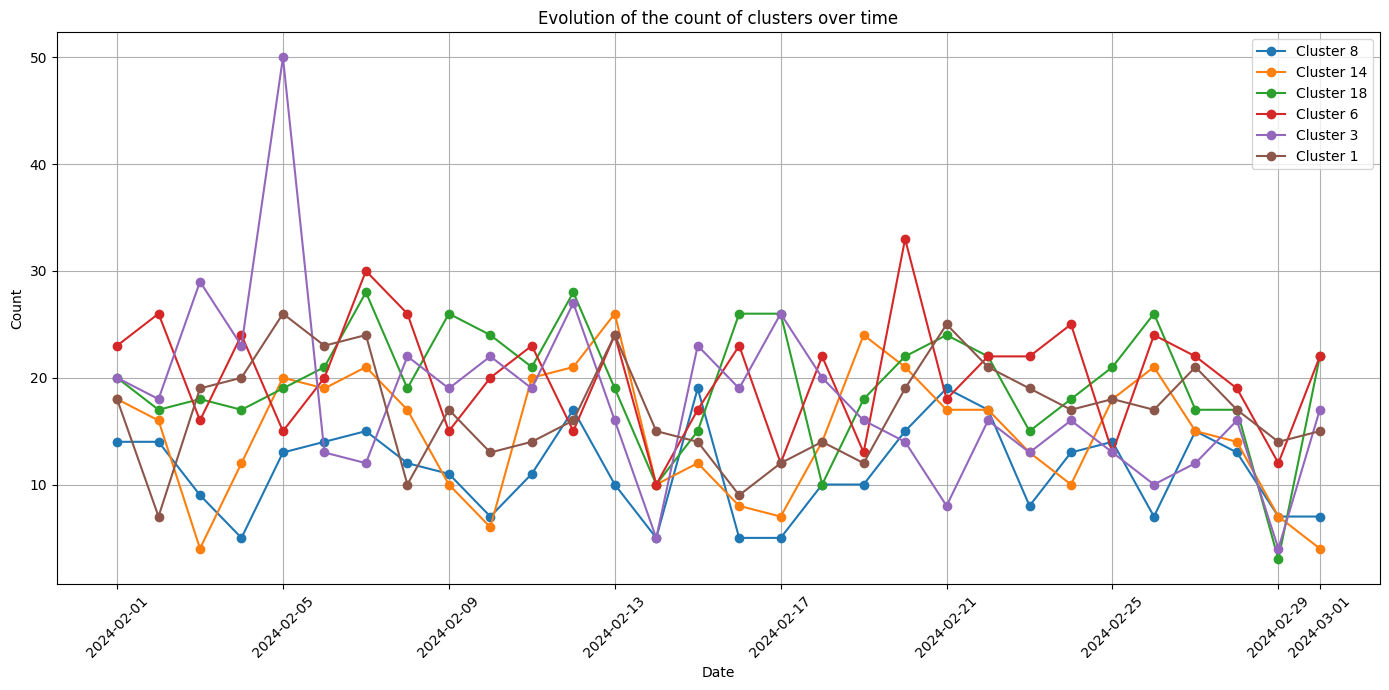

In [33]:
cluster_numbers = index_to_consider[0].tolist()
start_date = datetime(2024, 2, 1)
end_date = datetime(2024, 3, 1)
delta = timedelta(days=1)
plot_cluster_evolution(df, cluster_numbers, start_date, end_date)

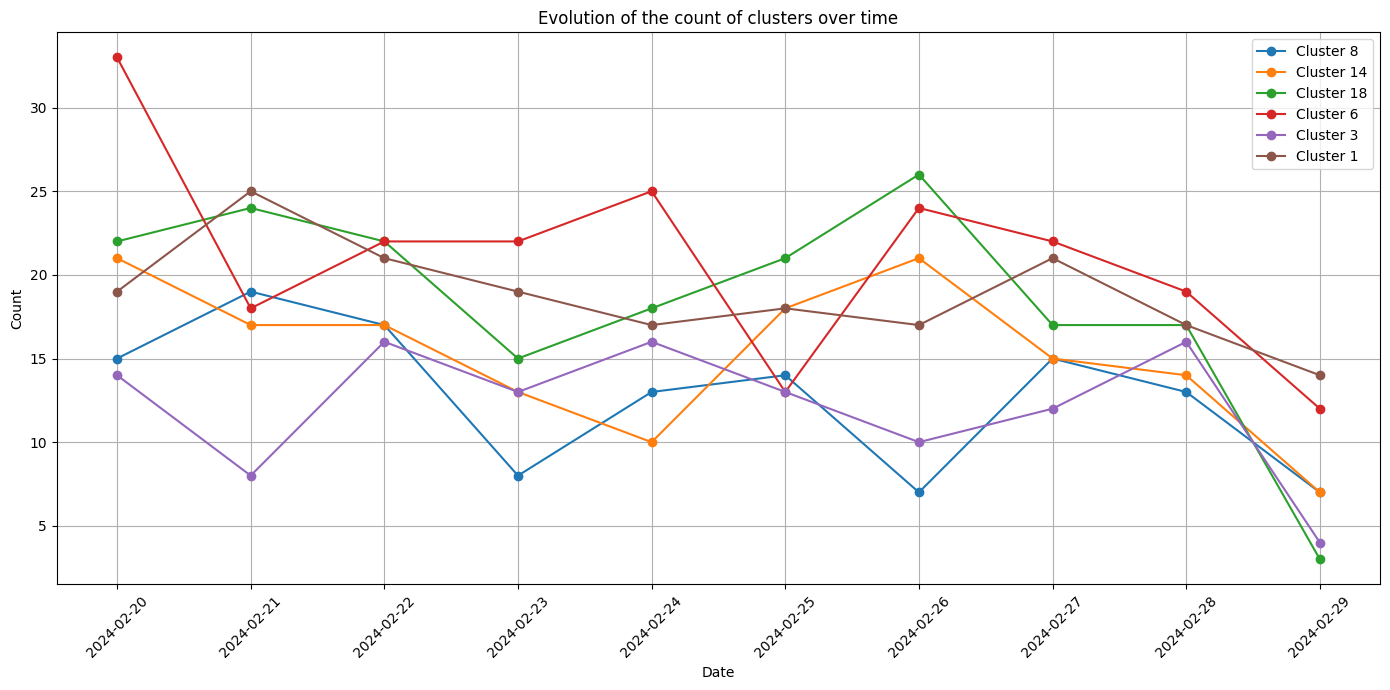

In [34]:
cluster_numbers = index_to_consider[0].tolist()
plot_cluster_evolution(df, cluster_numbers, '2024-02-20', '2024-02-29')

In [35]:
df_identificado = df[df['Cluster']==8]

In [18]:
df_identificado = df[(df['Cluster'] == 8) & (df["Date"] >= '2024-02-27') & (df["Date"] <= '2024-02-28')]
# Print news cluster 3 between 2024-01-30 and 2024-02-03
for i in range(len(df_identificado)):
    print(df_identificado.iloc[i]['Date'])
    print(df_identificado.iloc[i]['Title'])
    #print(df_identificado.iloc[i]['Abstract'])
    print('-------------------')

2024-02-27 00:00:00
GPT in 500 Lines of SQL | Hacker News
-------------------
2024-02-27 00:00:00
All in Podcast Makes the Case for the AI Decade and Terminal Nvidia Value of $10 Trillion
-------------------
2024-02-27 00:00:00
Nvidia’s free-tier GeForce Now will soon show ads while you’re waiting to play
-------------------
2024-02-27 00:00:00
Inexpensive SUVs go toe-to-toe in an Edmunds review of the Chevrolet Trax and the Honda HR-V
-------------------
2024-02-27 00:00:00
Samsung Galaxy Z Fold 6 renders appear ahead of rumored July Unpacked
-------------------
2024-02-27 00:00:00
Tumblr is selling user data to train AI. Things could get weird.
-------------------
2024-02-27 00:00:00
Samsung’s new microSD cards could make on-device AI easier
-------------------
2024-02-27 00:00:00
Exclusive: 29-year-old self-made millionaire Lucy Guo follows up her unicorn Scale AI with a $40 million Series A for new creator economy venture, Passes
-------------------
2024-02-27 00:00:00
Apple Cancel

In [19]:
df_identificado = df[(df['Cluster'] == 3) & (df["Date"] == '2024-02-05') ]
# Print news cluster 3 between 2024-01-30 and 2024-02-03
for i in range(len(df_identificado)):
    print(df_identificado.iloc[i]['Date'])
    print(df_identificado.iloc[i]['Title'])
    #print(df_identificado.iloc[i]['Abstract'])
    print('-------------------')

2024-02-05 00:00:00
Taylor Swift makes Grammy history with fourth album of the year win for ‘Midnights’ | CNN
-------------------
2024-02-05 00:00:00
Rapper Killer Mike arrested shortly after winning 3 Grammys
-------------------
2024-02-05 00:00:00
Jay-Z Calls Out the Grammys For Snubbing Beyoncé
-------------------
2024-02-05 00:00:00
SWIFT SMASHES ALBUM RECORD AT GRAMMY'S...
-------------------
2024-02-05 00:00:00
All the best reactions to Taylor Swift's surprise album announcement at the Grammys
-------------------
2024-02-05 00:00:00
Taylor Swift Makes Grammys History As Four-Time Album of the Year Award Winner
-------------------
2024-02-05 00:00:00
Taylor Swift becomes the first artist in Grammy history to win album of the year 4 times
-------------------
2024-02-05 00:00:00
Miley Cyrus wins Grammy Award for record of the year for her hit 'Flowers'
-------------------
2024-02-05 00:00:00
Taylor Swift wins album of the year Grammy Award for 'Midnights'
-------------------
2024-02

In [20]:
df_identificado = df[((df['Cluster'] == 8) | (df['Cluster'] == 14)) & (df["Date"] >= '2024-02-27') & (df["Date"] <= '2024-02-28')]
# Print news cluster 3 between 2024-01-30 and 2024-02-03
for i in range(len(df_identificado)):
    print(df_identificado.iloc[i]['Date'])
    print(df_identificado.iloc[i]['Title'])
    #print(df_identificado.iloc[i]['Abstract'])
    print('-------------------')

2024-02-27 00:00:00
GPT in 500 Lines of SQL | Hacker News
-------------------
2024-02-27 00:00:00
All in Podcast Makes the Case for the AI Decade and Terminal Nvidia Value of $10 Trillion
-------------------
2024-02-27 00:00:00
Nvidia’s free-tier GeForce Now will soon show ads while you’re waiting to play
-------------------
2024-02-27 00:00:00
B.C.'s child poverty rate trending upwards, report says
-------------------
2024-02-27 00:00:00
Self-made billionaire who became China's richest man by winning a corporate war with France's Danone dies at 79
-------------------
2024-02-27 00:00:00
Shein, the fast-fashion giant famous for $2 T-shirts, is exploring a London IPO after New York was too tough, sources say
-------------------
2024-02-27 00:00:00
Warren Buffett's Berkshire Hathaway flirts with $1 trillion valuation as stock briefly hits record high
-------------------
2024-02-27 00:00:00
Inexpensive SUVs go toe-to-toe in an Edmunds review of the Chevrolet Trax and the Honda HR-V
------

In [21]:
from transformers import BartForConditionalGeneration, BartTokenizer

model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")

In [22]:
input_text = """
Don't have $3,499 to spend on the Apple Vision Pro? Try these five headsets instead.
Apple, Skechers fall; Amazon, Deckers Outdoor rise, Friday, 2/2/2024
I waited in line to try Apple's Vision Pro for free on launch day. One feature blew me away.
Apple’s Vision Pro headset is hiding yet another XL Lightning plug
Apple’s $3,499 Vision Pro lacks Find My location tracking, so don’t lose it
Meta says Apple has made it ‘very difficult’ to build rival app stores in the EU
Mark Zuckerberg's Meta wants to burst Apple's blue bubbles: WhatsApp is coming for iMessage in the US
The Apple Watch Series 9 is on sale for $299 today only
Tim Cook wants to make 'spatial computing' a household term with the premiere of Apple's new Vision Pro headset
Apple Quadrupled Its Autonomous Driving Testing Miles Last Year
Reviewers keep mentioning how heavy the Vision Pro feels. Apple execs say there was no way to make it lighter.
Nolte: Box Office Tanks Again Thanks to $200M Apple Flop ‘Argylle’
"""

input_ids = tokenizer.encode("summarize: " + input_text, return_tensors="pt", max_length=512, truncation=True)

summary_ids = model.generate(input_ids, max_length=150, num_beams=2, length_penalty=2.0, early_stopping=True)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
print("Résumé généré :", summary)

Résumé généré : Apple's $3,499 Vision Pro lacks Find My location tracking, so don't lose it. Apple execs say there was no way to make the Vision Pro lighter. The Apple Watch Series 9 is on sale for $299 today only. Apple has made it ‘very difficult’ to build rival app stores in the EU.


Now an analysis of the cluster that where considered as important to our targer mission: clusters 8, 14, 11, 6 and 18

In [50]:
df_important_clusters = df[(df['Cluster'] == 8) | (df['Cluster'] == 14) | (df['Cluster'] == 11) | (df['Cluster'] == 6) | (df['Cluster'] == 18)]

In [51]:
def plot_relevant_data_evolution(df, start_date, end_date):
    plt.figure(figsize=(14, 7))
    
    # Filter the dataframe for the given cluster number and date range
    filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    
    # Group by 'Date' and count the occurrences
    count_series = filtered_df.groupby('Date').size()
    
    # Reindex the series to include all dates in the range, filling missing values with 0
    count_series = count_series.reindex(pd.date_range(start_date, end_date), fill_value=0)
    
    # Plotting
    plt.plot(count_series.index, count_series.values, marker='o', linestyle='-')
    
    plt.title('Evolution of the count of relevant data over time')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust layout to ensure everything fits without overlapping
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


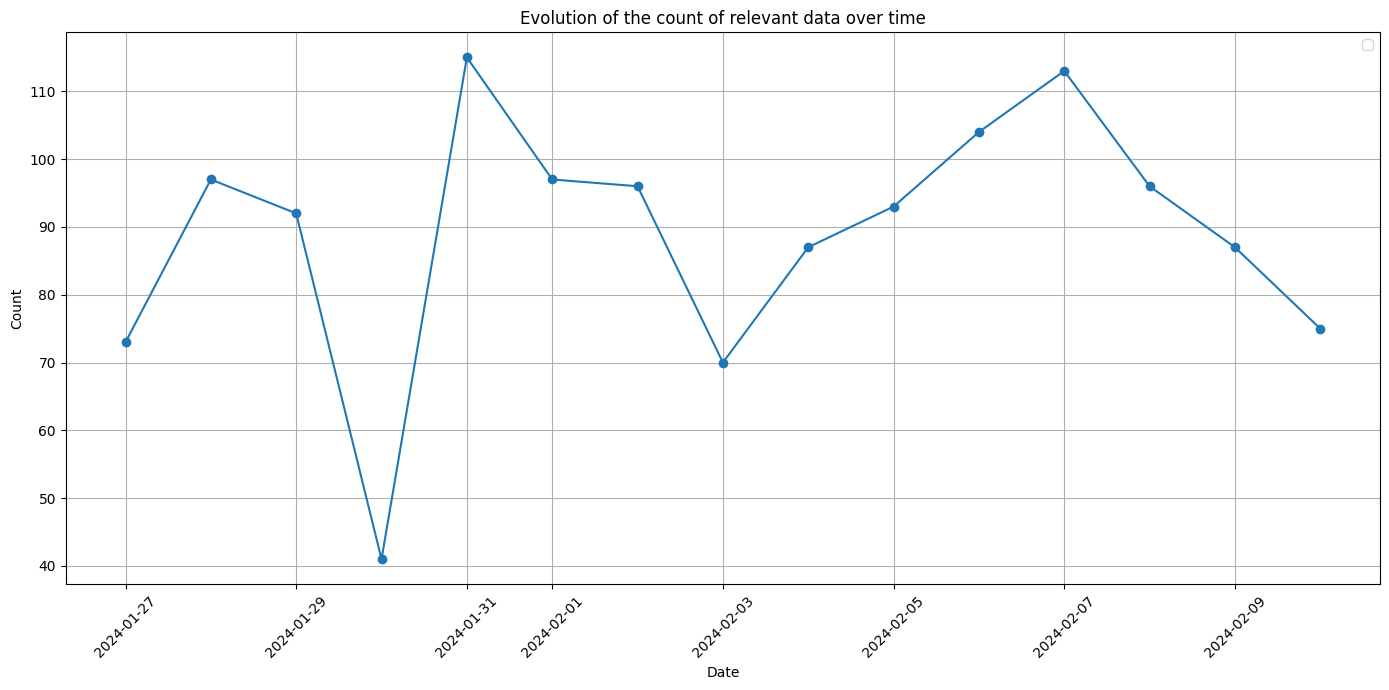

In [52]:
plot_relevant_data_evolution(df_important_clusters, '2024-01-27', '2024-02-10')

In [58]:
# df_important_clusters in day 31 january
df_identificado = df_important_clusters[(df_important_clusters["Date"] == '2024-01-31') & (df_important_clusters["Entity"] >= 0.1)]
df_identificado

,Date,Name,Title,Abstract,Embedding,Entity,Cluster,Similarity


In [55]:
for i in range(len(df_identificado)):
    print(df_identificado.iloc[i]['Title'])

A Tour of Lisps | Hacker News
China manufacturing contracts for a 4th straight month in January
Samsung is optimistic about AI-driven smartphones, despite losing sales crown
TikTok is about to find out if it can survive without Taylor Swift and Ice Spice
Taylor Swift songs to be removed from TikTok
Federal Reserve is likely to show little urgency to cut interest rates despite market's anticipation
Municipalities want grants restored as Alberta tracks towards surplus
Samsung reports decline in profit but anticipates business improvement driven by chips
China is a greater threat to the US than Russia and that's why the CIA doubled its budget for it, agency chief says
PayPal cuts 2,500 jobs in the face of competition
Oklahoma teachers who mistakenly received $15,000 to $50,000 in bonuses are now being told to give it all back
Houthi attacks in the Red Sea are now wrecking world cruisers' vacation plans
Baltimore Orioles agree to be sold to a group led by David Rubenstein for $1.7 billion 

In [63]:
df_apple['Date'] = pd.to_datetime(df_apple['Date'])
print(type(df_apple['Date'].iloc[0]))


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


C:\Users\Francisco García\AppData\Local\Temp\ipykernel_312\3164292238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apple['Date'] = pd.to_datetime(df_apple['Date'])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


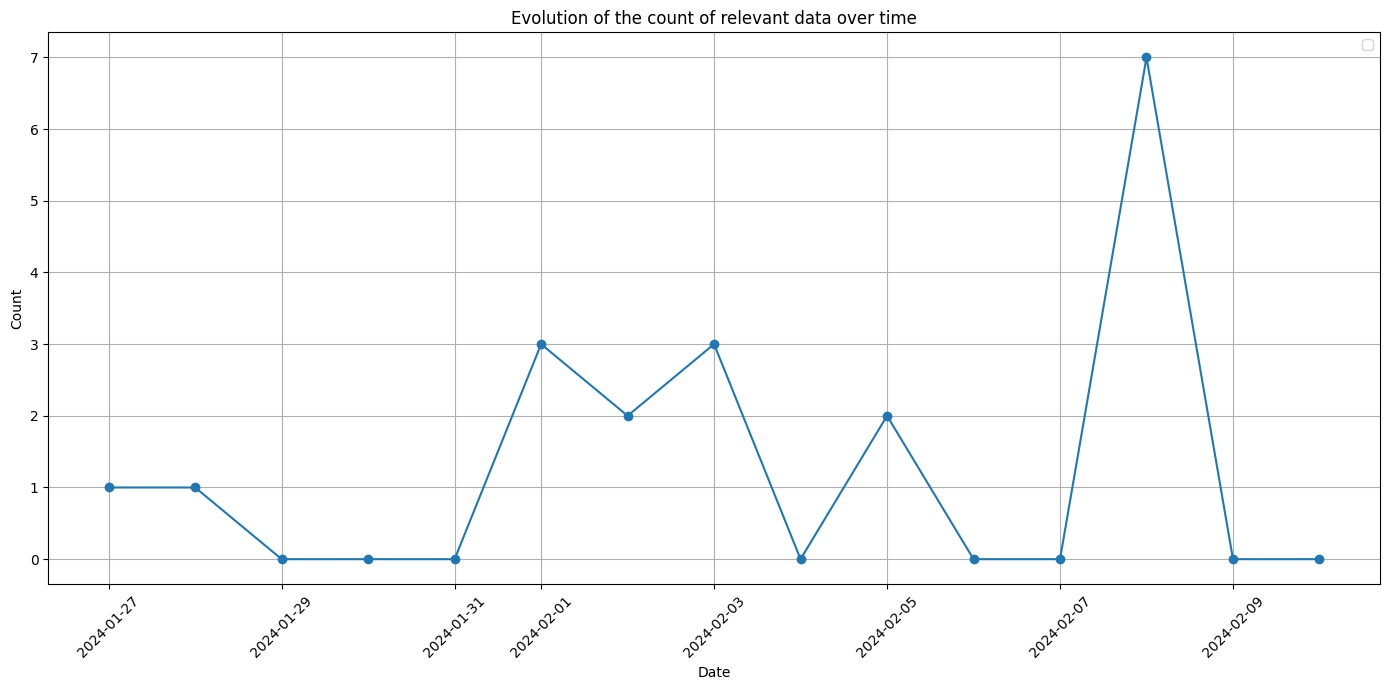

In [64]:
plot_relevant_data_evolution(df_apple, '2024-01-27', '2024-02-10')

In [65]:
df_identificado = df_apple[(df_apple["Date"] == '2024-02-08')]
for i in range(len(df_identificado)):
    print(df_identificado.iloc[i]['Title'])

Apple Beats an Apple Watch Lawsuit
Apple thanked a man charged with defrauding them out of more than $2.5 million in gift cards and electronics
Ex-Apple engineer sentenced to six months in prison for stealing self-driving car tech
Peter Thiel's 'Olympics on steroids' says it's considering letting athletes compete wearing Apple's Vision Pro
A top exec at Kim Kardashian’s new private equity fund once made it her mission to convince Apple’s Tim Cook not to hire her. It didn’t work
I've been using Vision Pro for 48 hours. It feels like Apple is onto something.
Apple argues against right-to-repair bill that would reduce its control


In [66]:
df_apple2 = df[(df['Title'].str.contains('Apple', case=False)) | (df['Abstract'].str.contains('Apple', case=False))]


In [67]:
df_apple2

,Date,Name,Title,Abstract,Embedding,Entity,Cluster,Similarity
548,2024-01-01,CNN,Apple shares slide following Barclays downgrad...,Apple stock fell on the first trading day of t...,"[0.059439354, -0.014855989, 0.12608327, 0.1418...",0.997639,14,0.580345
593,2024-01-01,ABC News,Apple-Podcasts-Top-Podcasts,Apple-Podcasts-Top-Podcasts Week ending 12/31/...,"[0.18859254, 0.24194096, 0.22294474, 0.4715705...",0.881936,22,0.505182
608,2024-01-01,The Verge,The latest Apple Watch SE is $50 off just in t...,Apple’s entry-level smartwatch is down to $199...,"[0.12820882, -0.08485577, 0.53736854, 0.117263...",0.000000,21,0.581894
625,2024-01-01,Fortune,Apple broke a 12-year tradition in 2023 and it...,This was the first year since its introduction...,"[0.020314213, 0.18376045, 0.58122826, -0.18166...",0.987280,8,0.620851
656,2024-01-01,The Verge,Jony Ive imagined the Vision Pro giving you Zo...,A new patent granted to Apple details how the ...,"[-0.08863665, 0.11724285, 0.47911286, -0.03954...",0.000000,11,0.541597
...,...,...,...,...,...,...,...,...
8319,2024-03-07,Business Insider,Apple's car prototype was internally called th...,Apple's car team cycled through several design...,"[-0.06703462, -0.020164426, 0.080158025, -0.21...",0.994468,9,0.661303
8392,2024-03-07,Engadget,MacBook Air 13-inch and 15-inch review (2024):...,It's hard to expect much from Apple's new M3-e...,"[-0.5647791, 0.03283194, 0.6061999, -0.0709444...",0.000000,8,0.637115
8394,2024-03-07,Ars Technica,Review: Apple’s efficient M3 MacBook Airs are ...,"For Intel or even M1 upgraders, there’s a lot ...","[-0.19768529, -0.19080421, 0.51033485, 0.24569...",0.963524,8,0.697580
8401,2024-03-07,The Verge,The M3 MacBook Air has a familiar look,The all-new 13-inch and 15-inch Apple MacBook ...,"[-0.16727792, -0.123754546, 0.74944264, 0.0626...",0.000000,8,0.592439


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


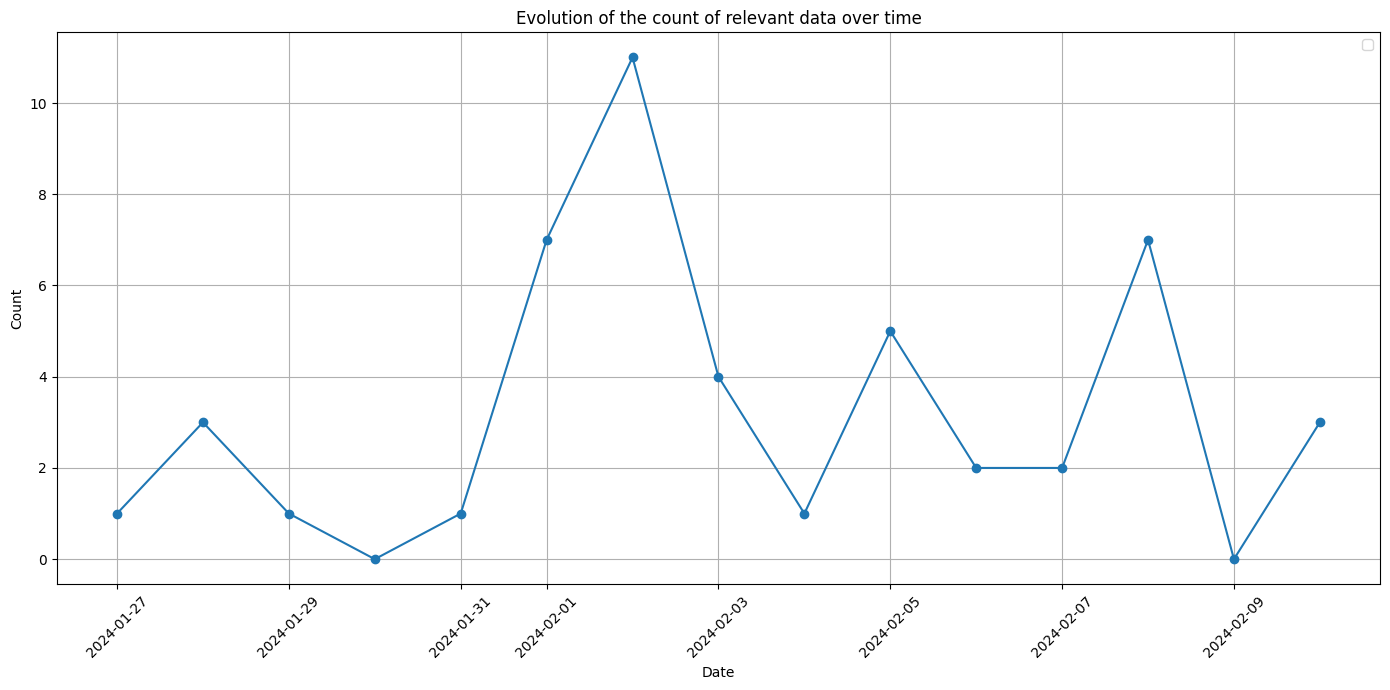

In [68]:
plot_relevant_data_evolution(df_apple2, '2024-01-27', '2024-02-10')

In [70]:
df_identificado = df_apple2[(df_apple2["Date"] == '2024-02-01')]
for i in range(len(df_identificado)):
    print(df_identificado.iloc[i]['Title'])

Don't have $3,499 to spend on the Apple Vision Pro? Try these five headsets instead.
Apple, Skechers fall; Amazon, Deckers Outdoor rise, Friday, 2/2/2024
I waited in line to try Apple's Vision Pro for free on launch day. One feature blew me away.
Joe Rogan renews deal with Spotify
Vince McMahon, former WWE exec, under federal investigation: Sources
Apple’s Vision Pro headset is hiding yet another XL Lightning plug
Apple’s $3,499 Vision Pro lacks Find My location tracking, so don’t lose it
